In [1]:
!which python

/home/syno/projects/adreader/venv/bin/python


In [2]:
# imports
# ----------------------

import pytesseract
import os
import glob
from PIL import Image
from IPython.display import display

In [3]:
os.getcwd()

'/home/syno/projects/adreader'

In [4]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [5]:
pytesseract.get_languages()

['eng', 'osd']

In [6]:
imgs_path = './ads_bitcoin/'

In [7]:
imgs_files = glob.glob(imgs_path + "*")
imgs_files

['./ads_bitcoin/Buy,-Sell-and-Trade-Bitcoin.jpg',
 './ads_bitcoin/golden-bitcoin-promotion-banner-crypto-mining-blockchain-advertising-concept-template-web-cryptocurrency-vector-224405264.jpg',
 './ads_bitcoin/a8da51ff8eb6bc17e49d79a4969e4702.jpg',
 './ads_bitcoin/bitcoin-ads-design-template-de87e58b76d0f011b43410d0940edfd6_screen.jpg',
 './ads_bitcoin/buy-sell-and-trade-bitcoin-finance-advertisem-design-template-5131f81dc05c69c88fcb55a3df8b75fa_screen.jpg']

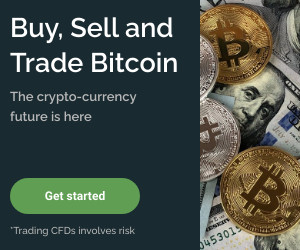

In [8]:
pil_img = Image.open(imgs_files[0])
display(pil_img)

In [9]:
print(pytesseract.image_to_string(pil_img))

Buy, Sell and
Trade Bitcoin

Resort
Gretna

 

 



### ^ not good enough

In [10]:
import cv2 as cv
from matplotlib import pyplot as plt

In [11]:
image = cv.imread(imgs_files[0])

In [12]:
image

array([[[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [  9,  17,  17],
        [ 51,  59,  59],
        [108, 118, 118]],

       [[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [ 23,  28,  29],
        [ 31,  39,  39],
        [ 98, 106, 106]],

       [[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [  6,  11,  12],
        [ 30,  35,  36],
        [ 48,  56,  56]],

       ...,

       [[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [154, 172, 171],
        [150, 168, 167],
        [163, 181, 180]],

       [[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [134, 152, 151],
        [156, 174, 173],
        [159, 180, 178]],

       [[ 49,  42,  25],
        [ 49,  42,  25],
        [ 49,  42,  25],
        ...,
        [117, 135, 134],
        [135, 153, 152],
        [144, 165, 163]]

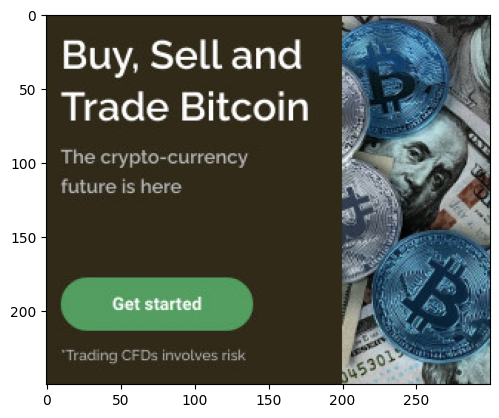

In [13]:
plt.imshow(image)
plt.show()

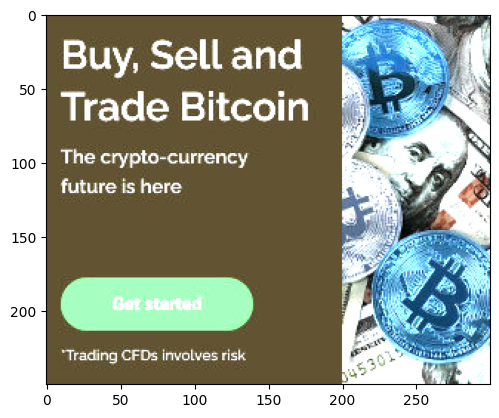

In [14]:
new_image = cv.convertScaleAbs(image, alpha=2, beta=0.5)
plt.cla()
plt.imshow(new_image)
plt.show()

In [15]:
print(pytesseract.image_to_string(new_image))

Buy, Sell and
Trade Bitcoin

Ricken omc
rey

tenet

 



In [16]:
print('Original Dimensions : ',new_image.shape)
 
scale_percent = 250
width = int(new_image.shape[1] * scale_percent / 100)
height = int(new_image.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv.resize(new_image, dim, interpolation = cv.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (250, 300, 3)
Resized Dimensions :  (625, 750, 3)


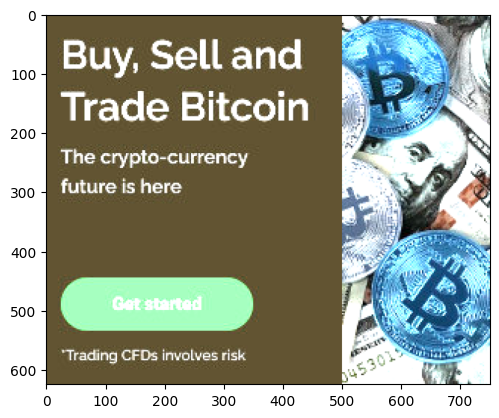

In [17]:
plt.cla()
plt.imshow(resized)
plt.show()

In [18]:
print(pytesseract.image_to_string(resized))

Buy, Sell and
Trade Bitcoin

The crypto-currency
future is here

 

“Trading CFDs involves risk

 



### ^ lets take it to a function

In [19]:
def prepare_img(image, alpha=2, beta=0.5, scale_percent=250):
    new_image = cv.convertScaleAbs(image, alpha=2, beta=0.5)
    scale_percent = 250
    width = int(new_image.shape[1] * scale_percent / 100)
    height = int(new_image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv.resize(new_image, dim, interpolation = cv.INTER_AREA)
    return resized

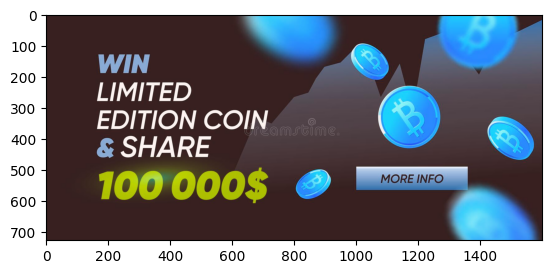

In [20]:
plt.cla()
plt.imshow(cv.imread(imgs_files[1]))
plt.show()

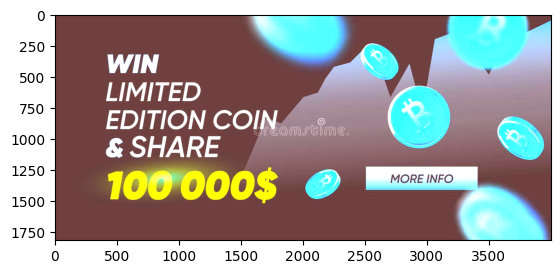

In [21]:
test2 = prepare_img(cv.imread(imgs_files[1]))

plt.cla()
plt.imshow(test2)
plt.show()

In [22]:
print(pytesseract.image_to_string(test2))

 

J

 

WIN
LIMITED

EDITION COIN....°:. VY @&&
& SHARE | an |

MORE INFO

    
    

 

  



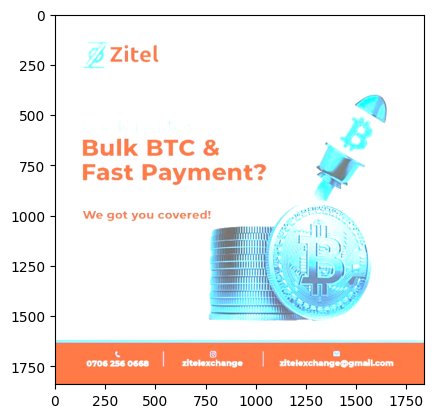

In [23]:
test3 = prepare_img(cv.imread(imgs_files[2]))
plt.cla()
plt.imshow(test3)
plt.show()

In [24]:
print(pytesseract.image_to_string(test3))

2 Zitel

Bulk BTC &
Fast Payment?

 

   

We got you covered!

 



### todo:
* test with black and white